<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/OnlineRetailCustomerSegmentation/blob/main/Online_Retail_Customer_SegmentationCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Mrutyunjaya Sahoo

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/sahoomrutyunjaya12345/OnlineRetailCustomerSegmentation.git

# **Problem Statement**


**In this project, my task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

## <b> Data Description </b>

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import missingno as msno
from datetime import datetime
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing our .csv data files by using unicode_escape for unicode format of our dataset if any
customer_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/unsupervised learning capstone/Online Retail.xlsx - Online Retail.csv',encoding= 'unicode_escape')

In [ ]:
# checking the first 5 dataset
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# checking the last 5 dataset
customer_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# checking the size of the dataset
customer_data.shape

(541909, 8)

Our customer_data has 541909 rows and 8 columns

In [ ]:
# checking the dataset columns
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# checking the datatypes of our dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Checking the null values if any
customer_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

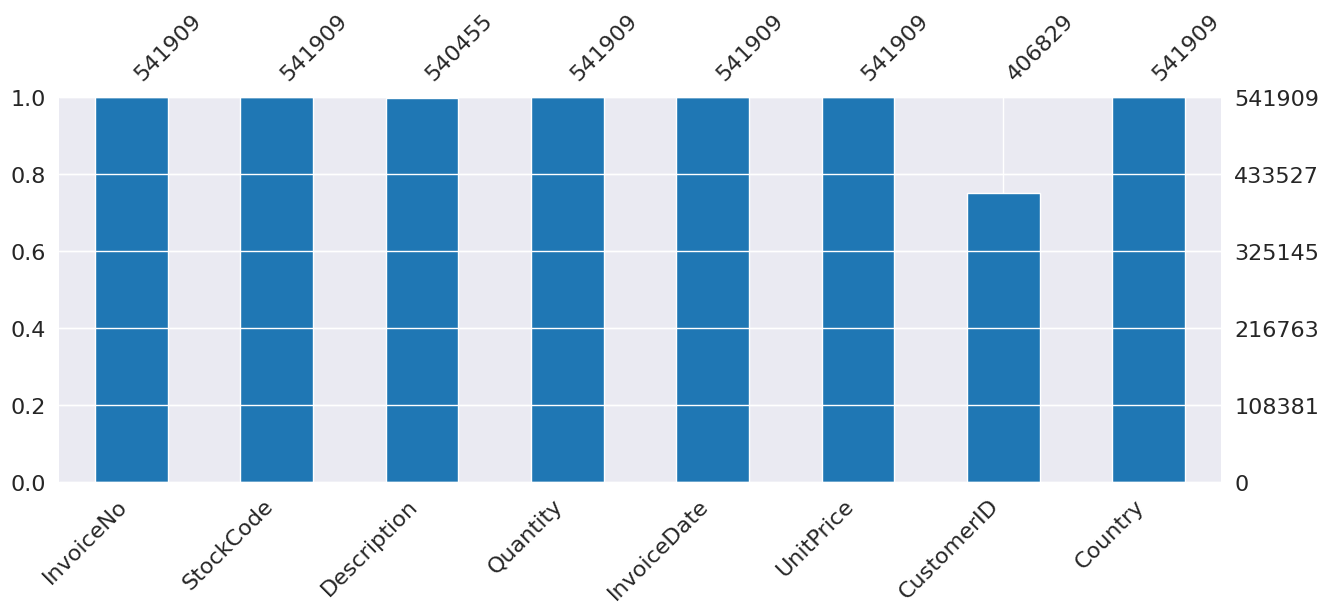

In [ ]:
# visualizing the null values through missingo library
msno.bar(customer_data,figsize=(15,5),color="tab:blue")

So in our customer_data has two columns which has null values i.e. Description and CustomerID

In [ ]:
# dropping those values with dropna()
customer_data.dropna(inplace=True)

In [ ]:
# after removing checking the null values if any
customer_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# After removing the null values checking for rows and columns
customer_data.shape

(406829, 8)

After removing the null values we have 406829 rows and 8 columns

In [ ]:
# Checking the how many unique values of our dataset have
customer_data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
# Checking the total number of duplicate values of our dataset have
print('Duplicate values in our dataset is :', len(customer_data[customer_data.duplicated()]))

Duplicate values in our dataset is : 5225


In [19]:
# Dropping the duplicate values in our dataset
customer_data.drop_duplicates(inplace=True)

In [20]:
# checking our dataset after dropping the duplicate values
customer_data.shape

(401604, 8)

So after dropping the dupicate values we have 401604 rows and 8 columns

In [24]:
# We have to drop the values of Invoice no which contains 'c',because it means cancelletion
customer_data = customer_data[~customer_data['InvoiceNo'].str.startswith('C')]
customer_data['InvoiceNo'].head(20)

0     536365
1     536365
2     536365
3     536365
4     536365
5     536365
6     536365
7     536366
8     536366
9     536367
10    536367
11    536367
12    536367
13    536367
14    536367
15    536367
16    536367
17    536367
18    536367
19    536367
Name: InvoiceNo, dtype: object

In [27]:
# Checking the summmary of our dataset
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Exploratory Data Analysis

In [28]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Top 10 Countries by Product Count

In [31]:
# Top 10 countries who's buying maximum products
Top_10_country = customer_data['Country'].value_counts().reset_index()
Top_10_country['Country %']= Top_10_country['Country']*100/customer_data['Country'].count()
# renaming the columns of our dataset
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country[:10]

,Country_Name,Count,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474
5,Netherlands,2363,0.601683
6,Belgium,2031,0.517147
7,Switzerland,1842,0.469022
8,Portugal,1453,0.369972
9,Australia,1184,0.301478


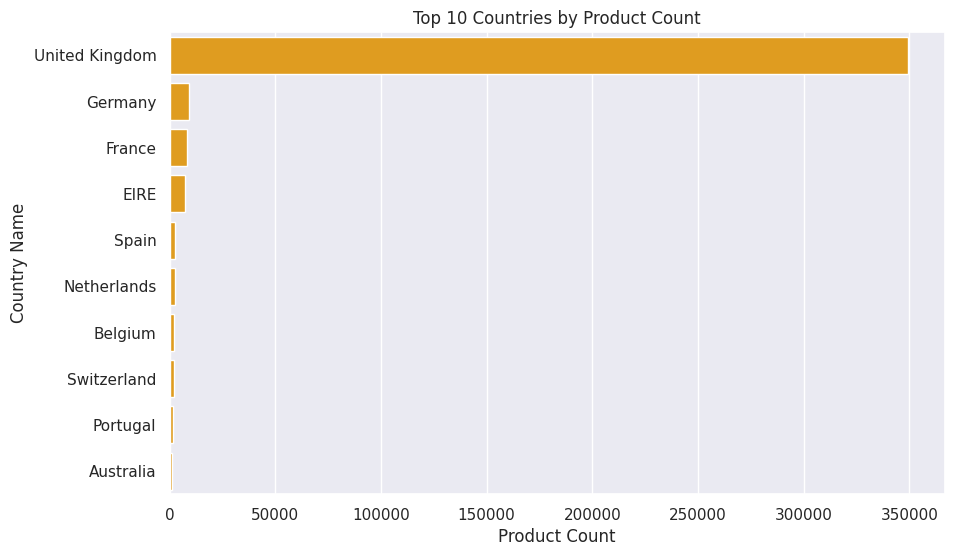

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Count', y='Country_Name', data=Top_10_country[:10], color='orange')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Product Count')
ax.set_xlabel('Product Count')
ax.set_ylabel('Country Name')

# Show the plot
plt.show()

Maximum orders are received from United Kingdom(UK) as company is UK based so.

### Top 10 countries with highest number of customers

In [42]:
# Create a DataFrame with the number of unique customers per country
customer_count = customer_data.groupby('Country')['CustomerID'].nunique().reset_index()

# Sort the DataFrame by number of customers in descending order
customer_count = customer_count.sort_values(by='CustomerID', ascending=False)

# Select the top 10 countries
top_10_countries = customer_count.head(10)

# Print the top 10 countries by number of customers
print(top_10_countries)


           Country  CustomerID
35  United Kingdom        3921
14         Germany          94
13          France          87
30           Spain          30
3          Belgium          25
32     Switzerland          21
26        Portugal          19
18           Italy          14
12         Finland          12
1          Austria          11


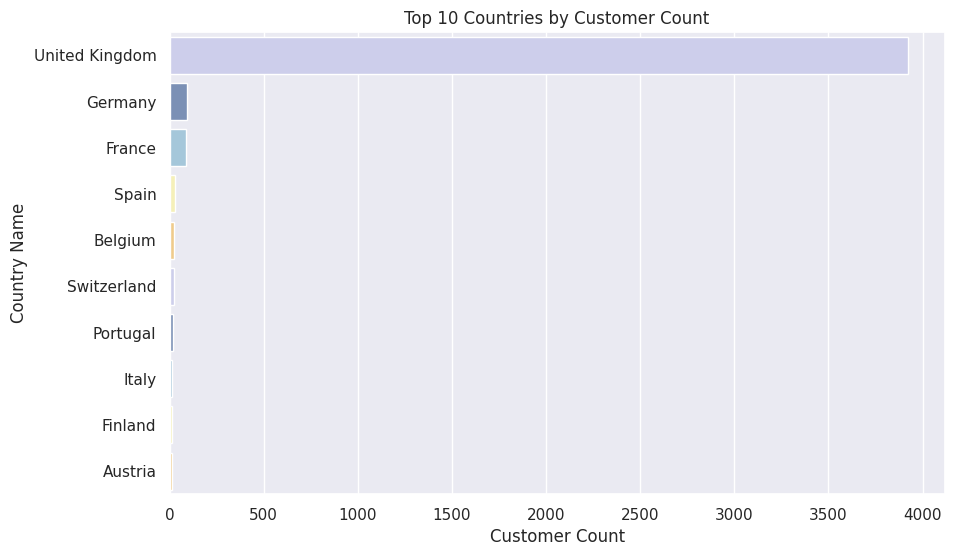

In [48]:
# Create a horizontal bar plot with seaborn
sns.set_style('darkgrid')
# Create a custom color palette
my_palette = ['#C8C9F0', '#718DBF', '#9CC9E3', '#FFF8AF', '#FFD07B']

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='CustomerID', y='Country', data=top_10_countries, palette=my_palette)

# Set the title and axis labels
ax.set_title('Top 10 Countries by Customer Count')
ax.set_xlabel('Customer Count')
ax.set_ylabel('Country Name')

# Show the plot
plt.show()